# Práctica 1: Vacunación COVID

## Preparación de la zona de trabajo

Importamos las librerías que vamos a necesitar para realizar la práctica

In [33]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tabulate import tabulate

Cargamos el dataset en un DataFrame de Pandas

In [34]:
datos = pd.read_csv("vacunaciones.csv")

Vamos a visualizar los primeros y últimos valores de nuestro DataFrame para asegurarnos de que se hayan cargado correctamente

In [35]:
datos.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [36]:
datos.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3203,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3207,Wales,NaN,2021-02-14,790211.0,784809.0,5402.0,13987.0,26206.0,25.06,24.89,0.17,8312.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


## Preprocesamiento de los datos

### Estandarización de los nombres

Primero de todo, vamos a estandarizar los nombres de nuestra base de datos:

In [37]:
print(datos.country.unique().tolist())

['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'England', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland', 'Guernsey', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'Northern Cyprus', 'Northern Ireland', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saint Helena', 'Saudi Arabia', 'Scotland', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'Turks an

Podemos observar que tenemos datos de Anguilla, Bermuda, Islas Caimán, Gibraltar, Guernsey, Isla de Man, Jersey, Irlanda del Norte, Inglaterra, Islas Turcas y Caicos, Santa Elena, Escocia, Gales que pertenecen al Reino Unido ("United Kingdom"), por tanto, tenemos información redundante:

In [38]:
datos = datos[datos.country.apply(lambda x: x not in ['Anguilla', 'Bermuda', 'Cayman Islands', 'Gibraltar', 'Guernsey', 
                                                      'Isle of Man', 'Jersey', 'Northern Ireland', 'England', 
                                                      'Turks and Caicos Islands', 'Saint Helena', 'Scotland', 'Wales'])]

Otra cosa que podemos hacer es fusionar Chipre y Chipre del Norte; este último es un estado con reconocimiento limitado que controla aproximadamente un tercio de la isla de Chipre. De hecho, Turquía es el único país que lo reconoce formalmente.

In [39]:
datos.country = datos.country.replace().replace({"Northern Cyprus" : "Cyprus"})

Comprobamos que todos los nombres de países han sido transformados correctamente

In [40]:
print(datos.country.unique().tolist())

['Albania', 'Algeria', 'Andorra', 'Argentina', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States']


### Ordenamiento por fecha y estandarización de esta

Podemos observar que el DataFrame esta ordenado por país y no por fecha, vamos a ordenarlo por fecha.

In [41]:
datos['date'] = pd.to_datetime(datos['date'])
datos = datos.sort_values('date', ascending=True)

### Tratamiento de los NaNs

Vamos a comprobar la cantidad faltante de datos en cada campo:

In [42]:
datos.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      888
people_vaccinated                      1241
people_fully_vaccinated                1834
daily_vaccinations_raw                 1190
daily_vaccinations                      112
total_vaccinations_per_hundred          888
people_vaccinated_per_hundred          1241
people_fully_vaccinated_per_hundred    1834
daily_vaccinations_per_million          112
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Podemos comprobar que hay bastantes registros faltantes, para solventar los de la columna “people vaccinated” cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para rellenar dicha celda. La media móvil solo la hemos aplicado con los datos respectivos de cada país, no con el total.

In [43]:
datos['people_vaccinated'] = datos.groupby('country')['people_vaccinated'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))

In [44]:
datos.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      888
people_vaccinated                       997
people_fully_vaccinated                1834
daily_vaccinations_raw                 1190
daily_vaccinations                      112
total_vaccinations_per_hundred          888
people_vaccinated_per_hundred          1241
people_fully_vaccinated_per_hundred    1834
daily_vaccinations_per_million          112
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

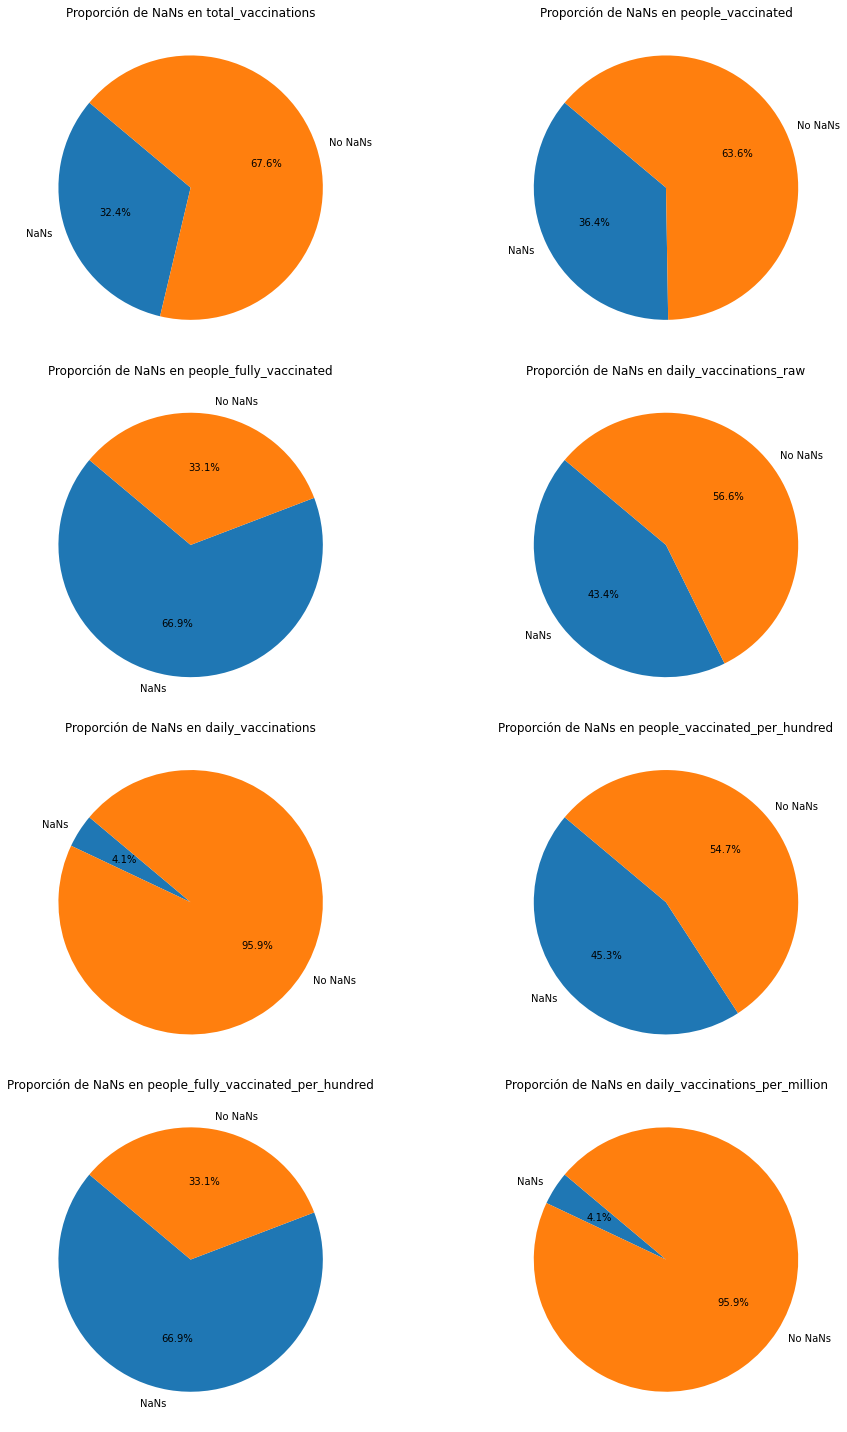

In [45]:
variables_nans = ['total_vaccinations','people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw',
                  'daily_vaccinations', 'people_vaccinated_per_hundred',
                  'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, var in enumerate(variables_nans):
    nan_count = datos[var].isna().sum()
    no_nan_count = len(datos) - nan_count
    
    labels = ['NaNs', 'No NaNs']
    sizes = [nan_count, no_nan_count]
    
    row = i // 2
    col = i % 2
    axs[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axs[row, col].set_title(f'Proporción de NaNs en {var}')
    
plt.tight_layout()
plt.show()

Es notable que tanto 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'people_fully_vaccinated' y 'people_fully_vaccinated_per_hundred' presentan un alto porcentaje de valores NaN. Esta situación genera preocupación, ya que estos campos son cruciales para evaluar el rendimiento de los planes de vacunación de los países.

In [46]:
nans_vaccinated_hundred = datos[datos['people_vaccinated_per_hundred'].isna()]
cantidad_nans_vaccinated_hundred = nans_vaccinated_hundred.groupby('country').size().reset_index(name='Cantidad NaNs')
cantidad_nans_vaccinated_hundred = cantidad_nans_vaccinated_hundred.sort_values(by='Cantidad NaNs', ascending=False)

cantidad_nans_vaccinated_hundred

,country,Cantidad NaNs
11,China,57
45,Russia,53
53,Switzerland,50
12,Costa Rica,48
14,Cyprus,42
55,United Arab Emirates,41
38,Netherlands,41
46,Saudi Arabia,40
22,Iceland,39
44,Qatar,38


In [47]:
nans_total_vaccinated_hundred = datos[datos['total_vaccinations_per_hundred'].isna()]
cantidad_nans_total_vaccinated_hundred = nans_total_vaccinated_hundred.groupby('country').size().reset_index(name='Cantidad NaNs')
cantidad_nans_total_vaccinated_hundred = cantidad_nans_total_vaccinated_hundred.sort_values(by='Cantidad NaNs', ascending=False)

cantidad_nans_total_vaccinated_hundred

,country,Cantidad NaNs
42,Russia,53
11,China,48
12,Costa Rica,45
49,Switzerland,40
22,Iceland,39
48,Sweden,37
41,Qatar,36
14,Cyprus,36
43,Saudi Arabia,31
25,Kuwait,28


In [48]:
nans_fully_vaccinated = datos[datos['people_fully_vaccinated'].isna()]
cantidad_nans_fully_vaccinated = nans_fully_vaccinated.groupby('country').size().reset_index(name='Cantidad NaNs')
cantidad_nans_fully_vaccinated = cantidad_nans_fully_vaccinated.sort_values(by='Cantidad NaNs', ascending=False)

cantidad_nans_fully_vaccinated

,country,Cantidad NaNs
15,China,57
61,Russia,57
6,Bahrain,55
71,Switzerland,50
16,Costa Rica,48
...,...,...
22,Egypt,7
1,Algeria,2
12,Cambodia,2
34,Iran,2


In [49]:
nans_fully_vaccinated_hundred = datos[datos['people_fully_vaccinated_per_hundred'].isna()]
cantidad_nans_fully_vaccinated_hundred = nans_fully_vaccinated_hundred.groupby('country').size().reset_index(name='Cantidad NaNs')
cantidad_nans_fully_vaccinated_hundred = cantidad_nans_fully_vaccinated_hundred.sort_values(by='Cantidad NaNs', ascending=False)

cantidad_nans_fully_vaccinated_hundred

,country,Cantidad NaNs
15,China,57
61,Russia,57
6,Bahrain,55
71,Switzerland,50
16,Costa Rica,48
...,...,...
22,Egypt,7
1,Algeria,2
12,Cambodia,2
34,Iran,2


Varios países muestran una cantidad significativa de valores NaN en los campos mencionados anteriormente, lo cual podría complicar el análisis. Es relevante señalar que algunos de estos países, como Rusia o China, tienen una gran relevancia en el contexto de la vacunación contra el COVID-19. Por lo tanto, el análisis podría verse afectado por un sesgo significativo.

Dado que la situación varía considerablemente de un país a otro, al aplicar la media móvil hay que emplear únicamente los datos del país del que queremos hacer la estimación.

In [50]:
datos['people_vaccinated_per_hundred'] = datos.groupby('country')['people_vaccinated_per_hundred'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['total_vaccinations_per_hundred'] = datos.groupby('country')['total_vaccinations_per_hundred'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['people_fully_vaccinated'] = datos.groupby('country')['people_fully_vaccinated'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['people_fully_vaccinated_per_hundred'] = datos.groupby('country')['people_fully_vaccinated_per_hundred'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))

Vamos a aplicar también la media móvil a "total_vaccinations", "people_fully_vaccinated" y "people_fully_vaccinated_per_hundred"

In [51]:
datos['total_vaccinations'] = datos.groupby('country')['total_vaccinations'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['people_fully_vaccinated'] = datos.groupby('country')['people_fully_vaccinated'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))
datos['people_fully_vaccinated_per_hundred'] = datos.groupby('country')['people_fully_vaccinated_per_hundred'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))


In [52]:
datos.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      505
people_vaccinated                       997
people_fully_vaccinated                1647
daily_vaccinations_raw                 1190
daily_vaccinations                      112
total_vaccinations_per_hundred          505
people_vaccinated_per_hundred           997
people_fully_vaccinated_per_hundred    1647
daily_vaccinations_per_million          112
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Podemos comprobar que, en términos porcentuales, la cantidad de valores NaN en "daily_vaccinations", "daily_vaccinations_per_million" y "people_vaccinated" es ínfima. Por tanto, podemos optar por eliminar directamente dichos registros.

In [53]:
datos = datos.dropna(subset=['daily_vaccinations', 'daily_vaccinations_per_million', 'people_vaccinated'])
datos.reset_index(drop=True, inplace=True)

Además, los registros en los que no disponemos del campo "total_vaccinations" resultan inútiles para nuestro estudio ya que no conocemos la gente que ha sido vacunada en dichos días, también podemos eliminarlos directamente.

In [54]:
datos = datos.dropna(subset=['total_vaccinations'])
datos.reset_index(drop=True, inplace=True)

Comprobamos nuevamente la cantidad de NaNs en nuestra base de datos:

In [55]:
datos.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                645
daily_vaccinations_raw                 387
daily_vaccinations                       0
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred    645
daily_vaccinations_per_million           0
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

Hemos logrado reducir notablemente la cantidad de valores NaN presentes en nuestra base de datos. Sin embargo, no podemos solucionar las demás variables con valores NaN, ya que dependen de otras variables como el tiempo y la población total del país. Parece contraproducente eliminar las muestras con NaN, ya que, si nos fijamos, "people_fully_vaccinated" y "people_fully_vaccinated_per_hundred" nos proporcionan prácticamente la misma información, por lo que no estamos perdiendo mucho contexto del dataset. Además, la cantidad de NaNs es pequeña en comparación con el resto del dataset. Optaremos por asignarles un valor de 0, ya que previamente hemos aplicado la media móvil para intentar solventar el problema, pero no ha variado su condición. Podemos concluir que los NaNs se encuentran en las primeras fechas recogidas y, por tanto, los países realmente tendrían un valor cercano a 0 en dichas variables.

In [56]:
datos[['people_fully_vaccinated', 'daily_vaccinations_raw', 'people_fully_vaccinated_per_hundred']] = datos[['people_fully_vaccinated', 'daily_vaccinations_raw', 'people_fully_vaccinated_per_hundred']].fillna(0)
datos.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

## Estudio de la Base de Datos

Vamos a comprobar cuáles son los países que más vacunas han puesto

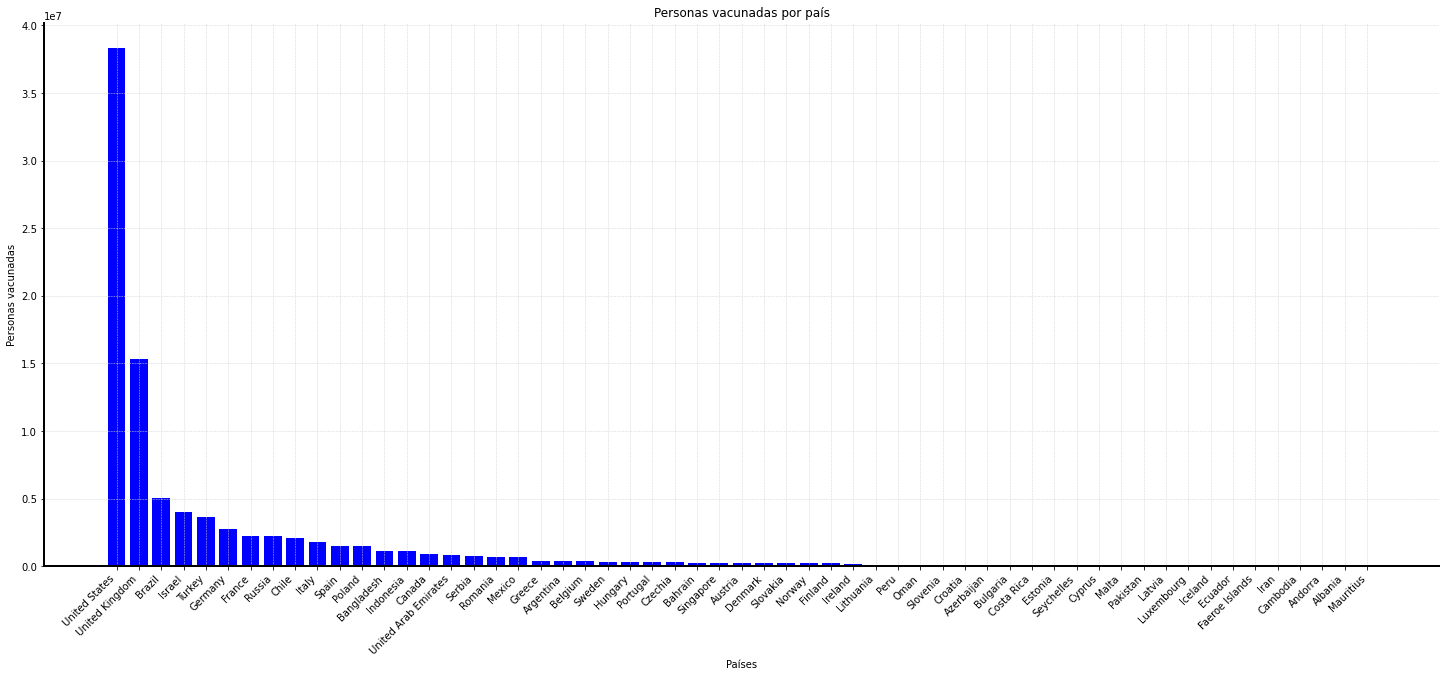

In [57]:
data = datos.sort_values('people_vaccinated', ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(data['country'], data['people_vaccinated'], color='blue')
plt.title('Personas vacunadas por país')
plt.xlabel('Países')
plt.ylabel('Personas vacunadas')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

Parece evidente que los países más poblados y ricos son los que más personas vacunadas tienen, sin embargo, esto no implica per sé que hayan tenido los mejores planes de vacunación, urge investigar los datos con más profundidad.

Vamos a estudiar la variabilidad de los cinco países con más personas vacunadas utilizando un diagrama de líneas que relacione el número de personas vacunadas por país con la fecha. De esta manera, podremos analizar la evolución temporal y también identificar la tendencia.

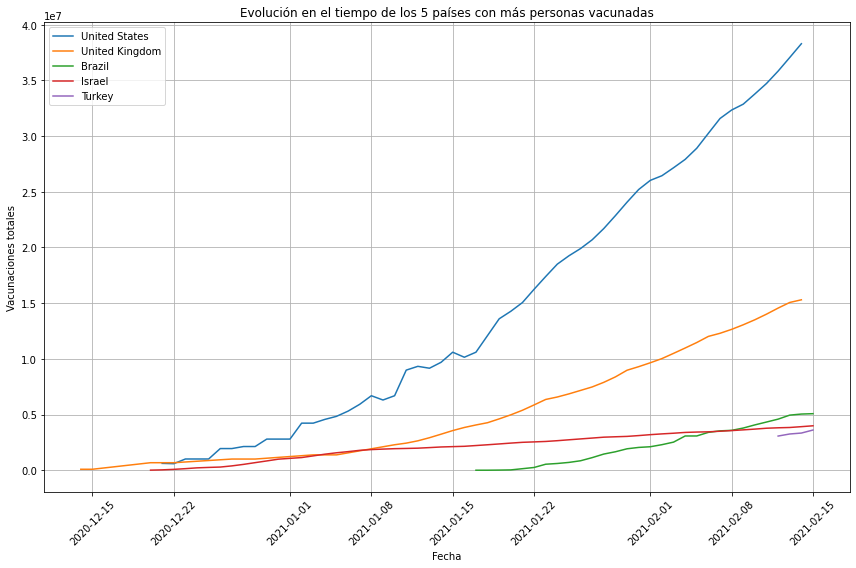

In [58]:
top_5_paises = datos.groupby('country')['people_vaccinated'].max().nlargest(5).index.tolist()
datos_top_5 = datos[datos['country'].isin(top_5_paises)]

plt.figure(figsize=(12, 8))
for pais in top_5_paises:
    datos_pais = datos_top_5[datos_top_5['country'] == pais]
    plt.plot(datos_pais['date'], datos_pais['people_vaccinated'], label=pais)

plt.title('Evolución en el tiempo de los 5 países con más personas vacunadas')
plt.xlabel('Fecha')
plt.ylabel('Vacunaciones totales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
data_table = []

for pais in top_5_paises:
    datos_pais = datos_top_5[datos_top_5['country'] == pais]['people_vaccinated']
    media = round(datos_pais.mean(), 3)
    desviacion_estandar = round(datos_pais.std(), 3)
    data_table.append([pais, media, desviacion_estandar])

print(tabulate(data_table, headers=["País", "Media", "Desviación estándar"], tablefmt="pretty"))

+----------------+--------------+---------------------+
|      País      |    Media     | Desviación estándar |
+----------------+--------------+---------------------+
| United States  | 15088859.136 |    11887066.966     |
| United Kingdom | 6455564.745  |     4732345.77      |
|     Brazil     |  2224696.0   |     1718218.781     |
|     Israel     | 2176133.569  |     1188610.53      |
|     Turkey     |  3316284.75  |     224586.588      |
+----------------+--------------+---------------------+


Podemos observar que tanto el Reino Unido como los Estados Unidos tienen desviaciones estándar muy altas en comparación con el resto de países, lo que indica una mayor variabilidad de los datos. Por otro lado, el país con la menor desviación estándar es Turquía; sin embargo, si nos fijamos en la gráfica previa, hay muy pocos datos disponibles para Turquía, lo que hace que su fiabilidad sea cuestionable. El segundo país con la menor desviación estándar es Israel, y de este sí tenemos una mayor cantidad de datos disponibles.

Podemos visualizar de una mejor manera la evolución de las personas vacunadas en todos los países en el siguiente gráfico.

In [60]:
datos['date'] = datos['date'].astype(str)
datos['iso_code'] = datos['iso_code'].astype(str)

fig = px.choropleth(
    datos,                         
    locations="iso_code",          
    color="people_vaccinated",                    
    hover_name="country",              
    animation_frame="date",
    color_continuous_scale='viridis',
    projection="natural earth",       
    range_color=[0, 5000000],
    title='<span style="font-size:36px; font-family:Times New Roman">Número de personas vacunadas por país</span>'
)            

fig.show()

datos['date'] = pd.to_datetime(datos['date'])
datos = datos.sort_values('date', ascending=True)

Resulta capcioso determinar que el país con el mejor plan de vacunación es aquel que tiene más personas vacunadas, ya que la población de todos los países no es uniforme. Aquellos con una población mayor pueden administrar más vacunas, lo que les otorga una 'ventaja' sobre aquellos con menos población. Por lo tanto, podemos estudiar las vacunaciones por cada cien habitantes para realizar una comparación más equitativa.

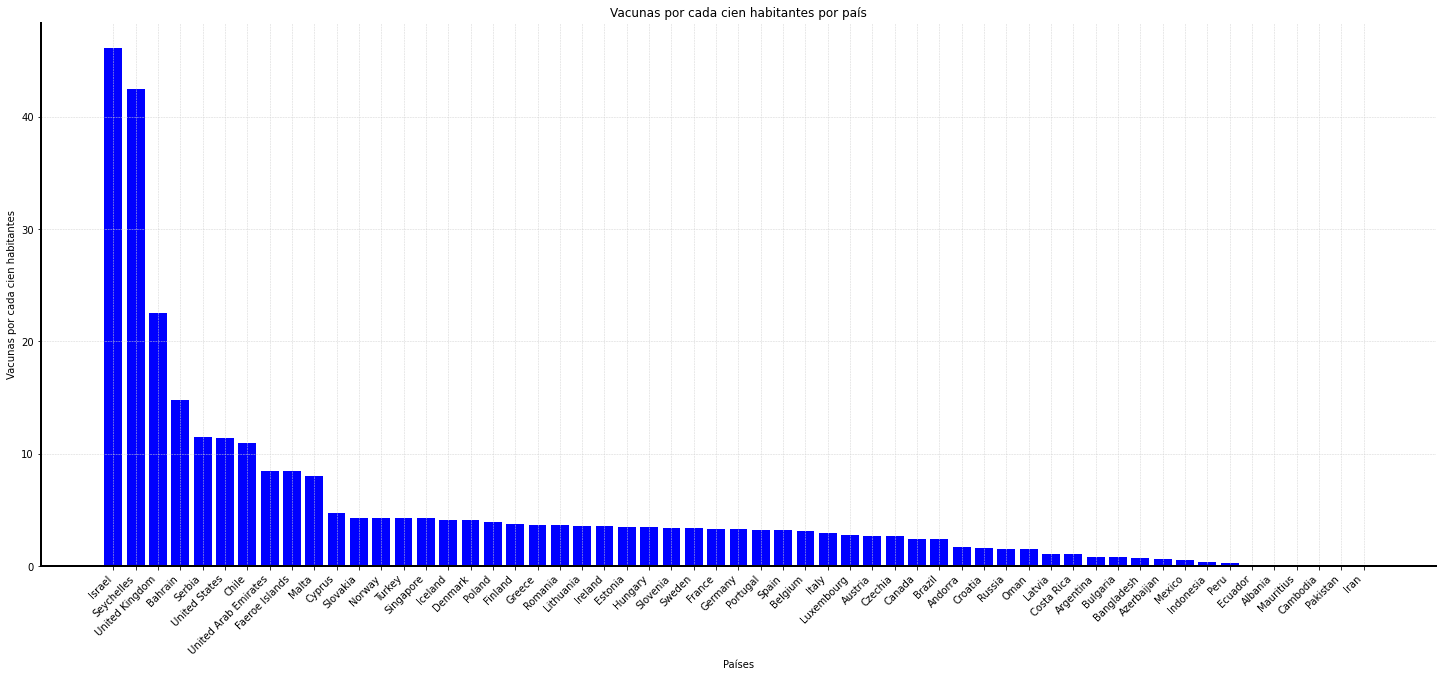

In [61]:
data = datos.sort_values('people_vaccinated_per_hundred', ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(data['country'], data['people_vaccinated_per_hundred'], color='blue')
plt.title('Vacunas por cada cien habitantes por país')
plt.xlabel('Países')
plt.ylabel('Vacunas por cada cien habitantes')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

Parece ser que tanto Israel como Seychelles son los países con los planes de vacunación más efectivos, ya que han logrado vacunar a más de un 40% de su población respectiva. Además, se distancian significativamente del tercer país con más vacunas por cada cien habitantes, el Reino Unido, que aparentemente ha logrado vacunar a un poco más del 20% de su población.

In [ ]:
top_5_paises = datos.groupby('country')['people_vaccinated_per_hundred'].max().nlargest(5).index.tolist()
datos_top_5 = datos[datos['country'].isin(top_5_paises)]

plt.figure(figsize=(12, 8))
for pais in top_5_paises:
    datos_pais = datos_top_5[datos_top_5['country'] == pais]
    plt.plot(datos_pais['date'], datos_pais['people_vaccinated_per_hundred'], label=pais)

plt.title('Variación de los 5 países con más vacunados por 100 habitantes')
plt.xlabel('Fecha')
plt.ylabel('Vacunados por 100 habitantes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_table = []

for pais in top_5_paises:
    datos_pais = datos_top_5[datos_top_5['country'] == pais]['people_vaccinated_per_hundred']
    media = round(datos_pais.mean(), 3)
    desviacion_estandar = round(datos_pais.std(), 3)
    data_table.append([pais, media, desviacion_estandar])

print(tabulate(data_table, headers=["País", "Media", "Desviación estándar"], tablefmt="pretty"))

Israel y Seychelles tienen las tasas más altas de vacunación por cada cien habitantes, lo que podría indicar un progreso significativo en sus programas de vacunación. Sin embargo, la alta desviación estándar en estos países sugiere cierta variabilidad en el proceso de vacunación. El Reino Unido, a pesar de tener una tasa más baja, muestra una desviación estándar moderada, lo que podría indicar una mayor consistencia en el número de personas vacunadas. Bahréin y Serbia tienen tasas más bajas en comparación con los otros países mencionados, pero Bahréin muestra una desviación estándar relativamente baja, lo que sugiere una menor variabilidad en las vacunaciones en comparación con Serbia.

In [ ]:
data = datos.sort_values('people_fully_vaccinated_per_hundred', ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(data['country'], data['people_fully_vaccinated_per_hundred'], color='blue')
plt.title('Vacunados completos por cada cien habitantes por país')
plt.xlabel('Países')
plt.ylabel('Vacunados completos por cada cien habitantes')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

Israel ocupa el primer lugar en cuanto al mayor número de vacunados completos por cada cien habitantes, con cerca del 30% de su población completamente vacunada. Además, duplica a Seychelles, que se encuentra en la segunda posición.

Israel ha logrado vacunar a una mayor proporción de su población, tanto de forma parcial como completa, en comparación con cualquier otro país. Además, su plan de vacunación se ha mantenido relativamente estable y constante, sin presentar grandes diferencias entre fechas. Podemos concluir que Israel tiene el plan de vacunación más efectivo.